## An Automated Presidential Doggy Door
### Fundamentals of Deep Learning
Part 5: Pre-Trained Models


#### Load the Model

In [2]:
from tensorflow.keras.applications import VGG16 
  
# load the VGG16 network *pre-trained* on the ImageNet dataset
model = VGG16(weights="imagenet")

553467096/553467096 [==============================] - 196s 0us/step


In [6]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

#### Model Input Layer
The (224, 224, 3) corresponding to 224 pixels high, 224 pixels wide, and 3 color channels.
Keras models can accept more than one image at a time for prediction. If we pass in just one image, the shape will be (1, 224, 224, 3). 

#### Load an Image

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    print(image.shape)
    plt.imshow(image)

(183, 276, 3)


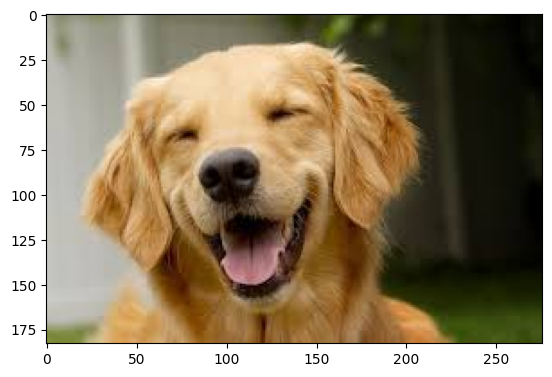

In [10]:
show_image("Data/dog.jpeg")

#### Preprocessing the Image
the final shape of the image needs to be (1, 224, 224, 3).

In [11]:
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.vgg16 import preprocess_input


def load_and_process_image(image_path):
    print("Original image shape:", mpimg.imread(image_path).shape)

    image = image_utils.load_img(image_path, target_size=(224, 224))
    
    image = image_utils.img_to_array(image)
    
    image = image.reshape(1,224,224,3)
    
    image = preprocess_input(image)
    
    print('Processed image shape: ', image.shape)
    return image

In [14]:
processed_image = load_and_process_image("Data/dog.jpeg")


Original image shape: (183, 276, 3)
Processed image shape:  (1, 224, 224, 3)


#### Making Predictions

In [16]:
from tensorflow.keras.applications.vgg16 import decode_predictions

def readable_prediction(image_path):
    # Show image
    show_image(image_path)
    # Load and pre-process image
    image = load_and_process_image(image_path)
    # Make predictions
    predictions = model.predict(image)
    # Print predictions in readable form
    print('Predicted:', decode_predictions(predictions, top=3))

(183, 276, 3)
Original image shape: (183, 276, 3)
Processed image shape:  (1, 224, 224, 3)
35363/35363 [==============================] - 0s 0us/step
Predicted: [[('n02099601', 'golden_retriever', 0.981837), ('n02090379', 'redbone', 0.0041212863), ('n02099267', 'flat-coated_retriever', 0.0037413787)]]


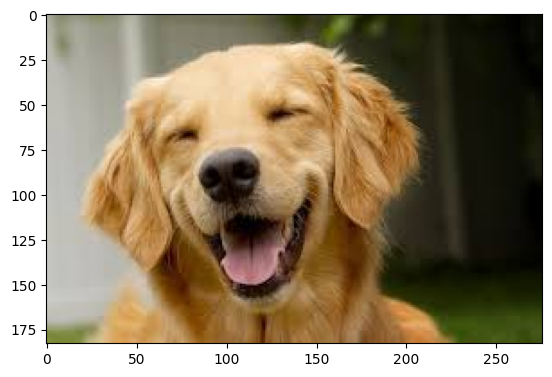

In [ ]:
readable_prediction("Data/dog.jpeg")

(182, 277, 3)
Original image shape: (182, 277, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 18ms/step
Predicted: [[('n02123159', 'tiger_cat', 0.47801736), ('n02124075', 'Egyptian_cat', 0.24235669), ('n02123045', 'tabby', 0.086727194)]]


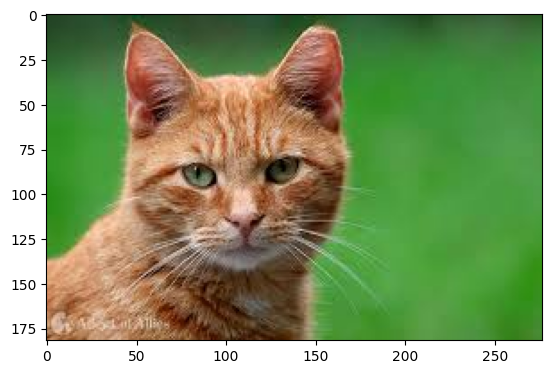

In [18]:
readable_prediction("Data/cat.jpeg")


(183, 275, 3)
Original image shape: (183, 275, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 19ms/step
Predicted: [[('n02132136', 'brown_bear', 0.99253744), ('n02133161', 'American_black_bear', 0.006924648), ('n02112137', 'chow', 0.00022331729)]]


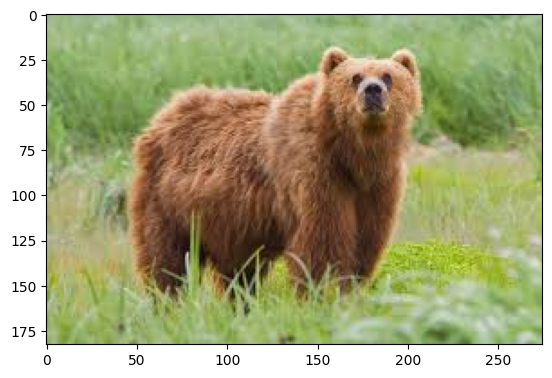

In [19]:
readable_prediction("Data/bear.jpeg")


#### Use Case: Only Dogs
The dogs are categories 151 through 268 and cats are categories 281 through 285.

In [21]:
import numpy as np

def doggy_door(image_path):
    show_image(image_path)
    image = load_and_process_image(image_path)
    preds = model.predict(image)
    if 151 <= np.argmax(preds) <= 268:
        print("Doggy come on in!")
    elif 281 <= np.argmax(preds) <= 285:
        print("Kitty stay inside!")
    else:
        print("Stay outside!")

(183, 275, 3)
Original image shape: (183, 275, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 20ms/step
Stay outside!


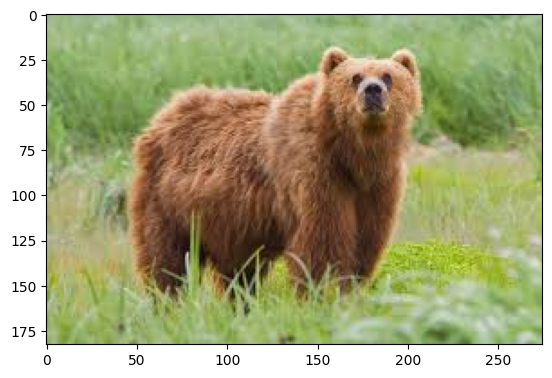

In [22]:
doggy_door("Data/bear.jpeg")


(182, 277, 3)
Original image shape: (182, 277, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 20ms/step
Kitty stay inside!


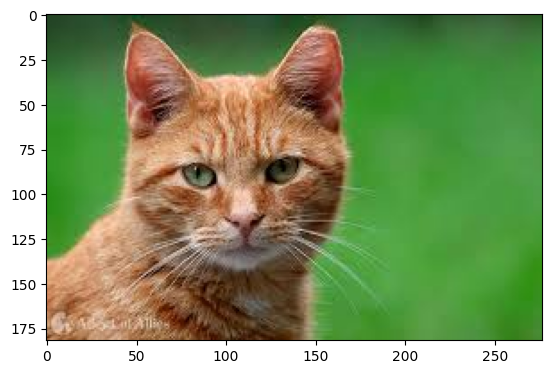

In [23]:
doggy_door("Data/cat.jpeg")


(183, 276, 3)
Original image shape: (183, 276, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 20ms/step
Doggy come on in!


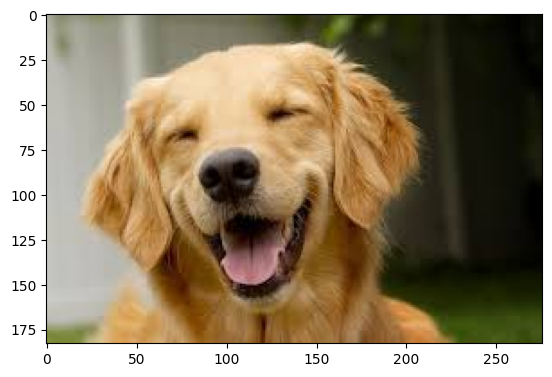

In [24]:
doggy_door("Data/dog.jpeg")
